In [5]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-13 00:00:00+09:00,27705.369141,27727.660156,27444.130859,27513.130859,264800000,0.0,0.0
2023-02-20 00:00:00+09:00,27497.130859,27538.289062,27046.080078,27453.480469,274800000,0.0,0.0
2023-02-27 00:00:00+09:00,27322.730469,27961.210938,27292.740234,27927.470703,363000000,0.0,0.0
2023-03-06 00:00:00+09:00,28182.310547,28734.789062,28118.740234,28143.970703,386300000,0.0,0.0
2023-03-13 00:00:00+09:00,27886.210938,27906.970703,26632.919922,27333.789062,517000000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0


In [6]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-10 00:00:00+09:00,23714.519531,23738.419922,23603.480469,23687.589844,69100000,0.0,0.0
2020-02-17 00:00:00+09:00,23489.779297,23806.560547,23133.599609,23386.740234,300500000,0.0,0.0
2020-02-24 00:00:00+09:00,22949.369141,22950.230469,20916.400391,21142.960938,459800000,0.0,0.0
2020-03-02 00:00:00+09:00,20849.789062,21719.779297,20613.910156,20749.750000,521000000,0.0,0.0
2020-03-09 00:00:00+09:00,20343.310547,20347.189453,16690.599609,17431.050781,862200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0


In [7]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-02-10 00:00:00+09:00,23714.519531,23738.419922,23603.480469,23687.589844,69100000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-17 00:00:00+09:00,23489.779297,23806.560547,23133.599609,23386.740234,300500000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00+09:00,22949.369141,22950.230469,20916.400391,21142.960938,459800000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-02 00:00:00+09:00,20849.789062,21719.779297,20613.910156,20749.750000,521000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-09 00:00:00+09:00,20343.310547,20347.189453,16690.599609,17431.050781,862200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0,38639.265625,37948.859375,39400.430664,35771.502441,41577.787598
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0,38543.541016,37948.859375,39165.591797,36123.760742,40990.690430
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0,38639.265625,38055.921875,39400.430664,36039.158691,41417.193848


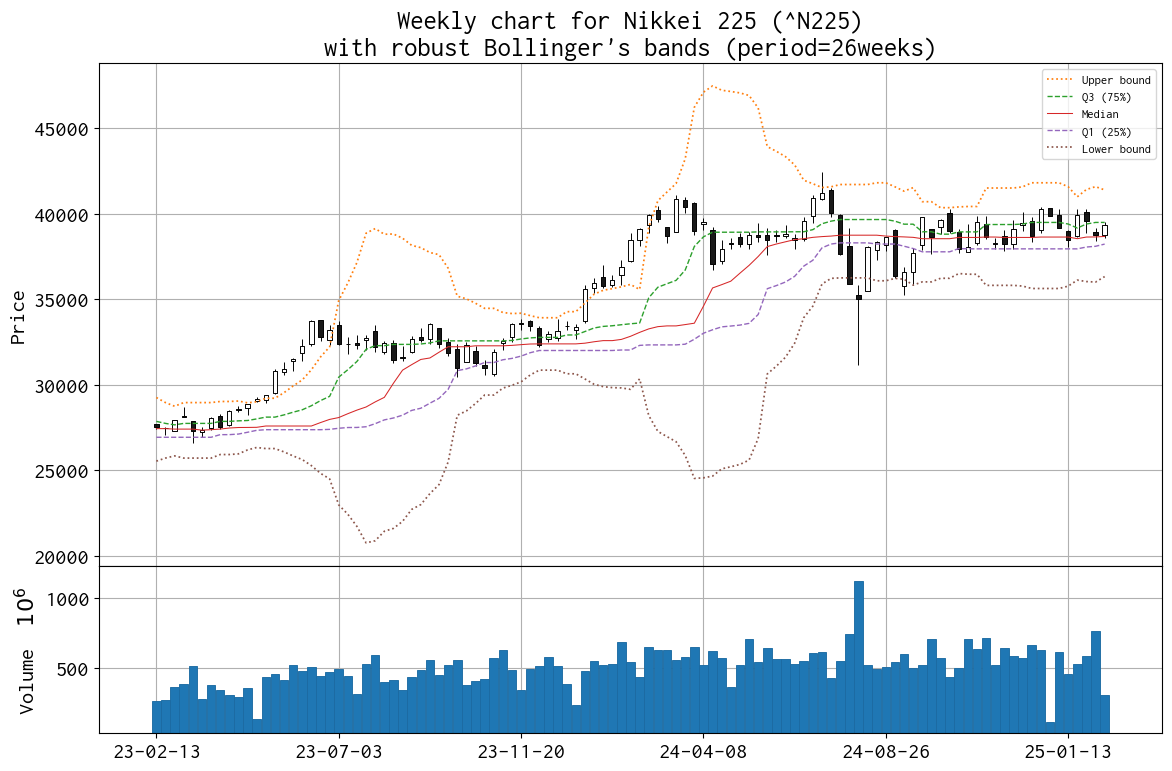

In [8]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_n225.png')
plt.show()

In [35]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39182.761719,249200000,0.0,0.0


In [36]:
df.tail(2)['Close']

Date
2025-01-20 00:00:00+09:00    39931.980469
2025-01-27 00:00:00+09:00    39182.761719
Name: Close, dtype: float64

In [37]:
df.tail(2)['Close'].diff()

Date
2025-01-20 00:00:00+09:00          NaN
2025-01-27 00:00:00+09:00   -749.21875
Name: Close, dtype: float64

In [38]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-27 00:00:00+09:00   -944.976562
dtype: float64

In [39]:
df['Close'].rolling(13).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-02-05 00:00:00+09:00             NaN
2024-02-12 00:00:00+09:00             NaN
2024-02-19 00:00:00+09:00             NaN
2024-02-26 00:00:00+09:00             NaN
2024-03-04 00:00:00+09:00             NaN
2024-03-11 00:00:00+09:00             NaN
2024-03-18 00:00:00+09:00             NaN
2024-03-25 00:00:00+09:00             NaN
2024-04-01 00:00:00+09:00             NaN
2024-04-08 00:00:00+09:00             NaN
2024-04-15 00:00:00+09:00             NaN
2024-04-22 00:00:00+09:00    38748.105769
2024-04-29 00:00:00+09:00    38907.955829
2024-05-06 00:00:00+09:00    39010.393329
2024-05-13 00:00:00+09:00    39033.481070
2024-05-20 00:00:00+09:00    38998.667969
2024-05-27 00:00:00+09:00    38889.212440
2024-06-03 00:00:00+09:00    38811.903846
2024-06-10 00:00:00+09:00    38820.128305
2024-06-17 00:00:00+09:00    38643.823618
2024-06-24 00:00:00+09:00    38583.334135
2024-07-01 00:00:00+09:00    38731.048978
2024-07-08 00:00:00+09:00    

In [40]:
df['Close'].rolling(26).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-02-05 00:00:00+09:00             NaN
2024-02-12 00:00:00+09:00             NaN
2024-02-19 00:00:00+09:00             NaN
2024-02-26 00:00:00+09:00             NaN
2024-03-04 00:00:00+09:00             NaN
2024-03-11 00:00:00+09:00             NaN
2024-03-18 00:00:00+09:00             NaN
2024-03-25 00:00:00+09:00             NaN
2024-04-01 00:00:00+09:00             NaN
2024-04-08 00:00:00+09:00             NaN
2024-04-15 00:00:00+09:00             NaN
2024-04-22 00:00:00+09:00             NaN
2024-04-29 00:00:00+09:00             NaN
2024-05-06 00:00:00+09:00             NaN
2024-05-13 00:00:00+09:00             NaN
2024-05-20 00:00:00+09:00             NaN
2024-05-27 00:00:00+09:00             NaN
2024-06-03 00:00:00+09:00             NaN
2024-06-10 00:00:00+09:00             NaN
2024-06-17 00:00:00+09:00             NaN
2024-06-24 00:00:00+09:00             NaN
2024-07-01 00:00:00+09:00             NaN
2024-07-08 00:00:00+09:00    

In [41]:
df['Close'].rolling(52).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-02-05 00:00:00+09:00             NaN
2024-02-12 00:00:00+09:00             NaN
2024-02-19 00:00:00+09:00             NaN
2024-02-26 00:00:00+09:00             NaN
2024-03-04 00:00:00+09:00             NaN
2024-03-11 00:00:00+09:00             NaN
2024-03-18 00:00:00+09:00             NaN
2024-03-25 00:00:00+09:00             NaN
2024-04-01 00:00:00+09:00             NaN
2024-04-08 00:00:00+09:00             NaN
2024-04-15 00:00:00+09:00             NaN
2024-04-22 00:00:00+09:00             NaN
2024-04-29 00:00:00+09:00             NaN
2024-05-06 00:00:00+09:00             NaN
2024-05-13 00:00:00+09:00             NaN
2024-05-20 00:00:00+09:00             NaN
2024-05-27 00:00:00+09:00             NaN
2024-06-03 00:00:00+09:00             NaN
2024-06-10 00:00:00+09:00             NaN
2024-06-17 00:00:00+09:00             NaN
2024-06-24 00:00:00+09:00             NaN
2024-07-01 00:00:00+09:00             NaN
2024-07-08 00:00:00+09:00    

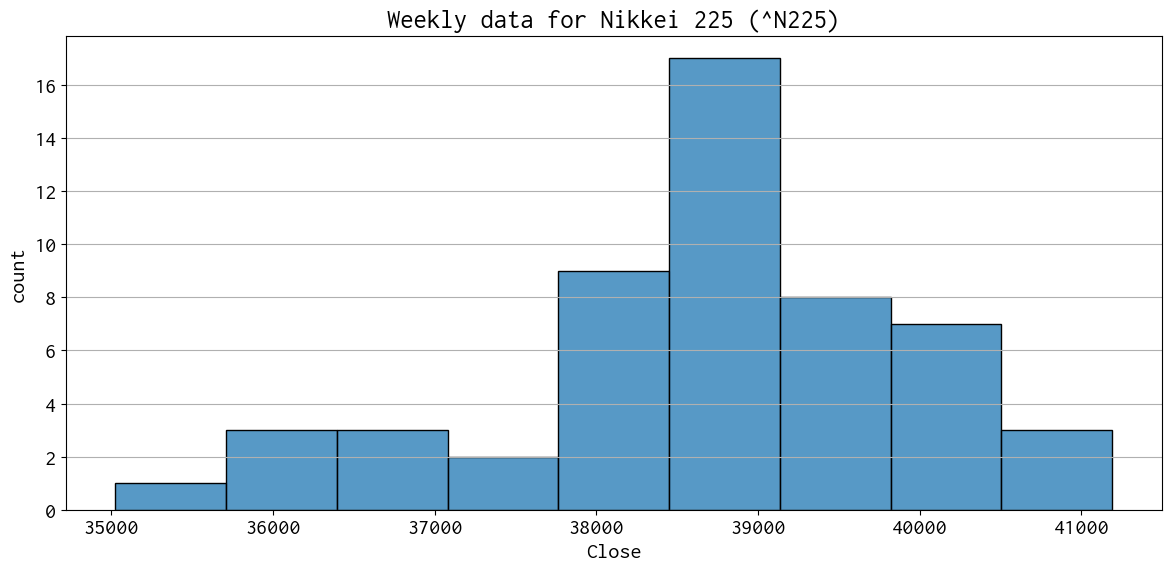

In [42]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_n225.png')
plt.show()

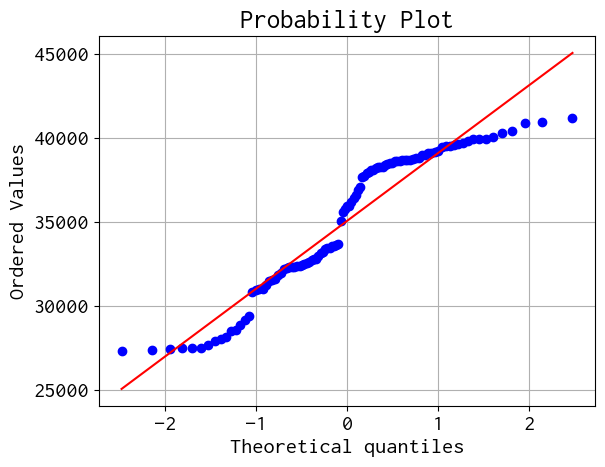

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9109671609573478, p-value: 2.9799868693985764e-06
